<a href="https://colab.research.google.com/github/Faizaa01/Machine_Learning_Fundamentals/blob/main/Naive_Bayes_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (7, 4)

In [4]:
data = load_breast_cancer()
X = data.data
y = data.target

df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

print('Shape of X: ', X.shape)
print('Shape of y: ', y.shape)
print('Target_names: ', data.target_names)
df.head()

Shape of X:  (569, 30)
Shape of y:  (569,)
Target_names:  ['malignant' 'benign']


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


target
1    357
0    212
Name: count, dtype: int64


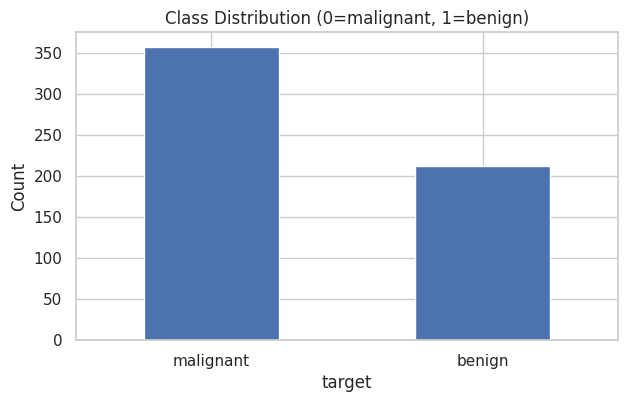

In [5]:
class_counts = df['target'].value_counts()
print(class_counts)

plt.figure()
class_counts.plot(kind='bar')
plt.xticks(ticks=[0,1], labels=data.target_names, rotation=0)
plt.ylabel('Count')
plt.title('Class Distribution (0=malignant, 1=benign)')
plt.show()

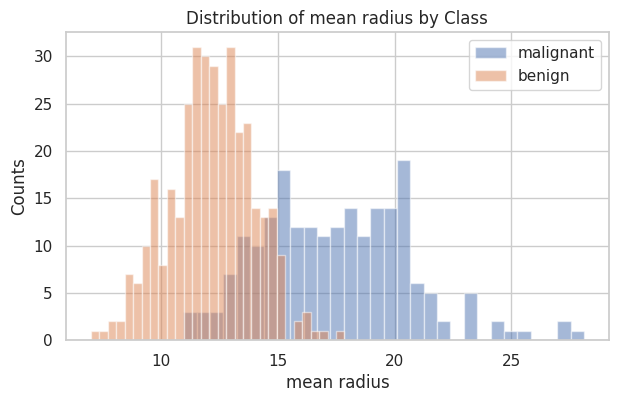

In [7]:
feature_name = 'mean radius'
feat_idx = list(data.feature_names).index(feature_name)

plt.figure()
plt.hist(X[y==0][:, feat_idx], bins=30, alpha=0.5, label='malignant')
plt.hist(X[y==1][:, feat_idx], bins=30, alpha=0.5, label='benign')
plt.legend()
plt.xlabel(feature_name)
plt.ylabel('Counts')
plt.title(f'Distribution of {feature_name} by Class')
plt.show()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)
X_test.shape

(143, 30)

In [11]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy: ', acc)
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix: ")
print(cm)

Accuracy:  0.9370629370629371
Confusion matrix: 
[[46  7]
 [ 2 88]]


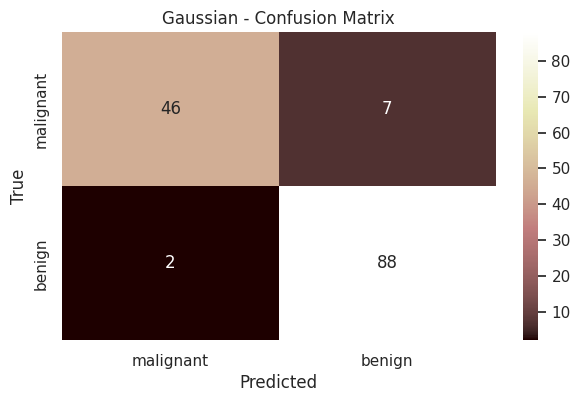

In [13]:
sns.heatmap(cm, annot=True, fmt='d', cmap='pink',
    xticklabels=data.target_names, yticklabels=data.target_names)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Gaussian - Confusion Matrix')
plt.show()

In [14]:
print(classification_report(y_test, y_pred, target_names=data.target_names))

              precision    recall  f1-score   support

   malignant       0.96      0.87      0.91        53
      benign       0.93      0.98      0.95        90

    accuracy                           0.94       143
   macro avg       0.94      0.92      0.93       143
weighted avg       0.94      0.94      0.94       143



In [25]:
texts = [
    'I love this product',
    'This is amazing and fantastic',
    'I really like this',
    'I hate this item',
    'This is the worst thing ever',
    'Horrible and terrible experience',
]
labels = [1,1,1,0,0,0]
toy_df = pd.DataFrame({'text': texts, 'label': labels})
toy_df

,text,label
0,I love this product,1
1,This is amazing and fantastic,1
2,I really like this,1
3,I hate this item,0
4,This is the worst thing ever,0
5,Horrible and terrible experience,0


In [26]:
vectorizer = CountVectorizer()
X_toy = vectorizer.fit_transform(toy_df['text'])
y_toy = toy_df['label']

print("Feature matrix shape: ", X_toy.shape)
print("Vocabulary: ",vectorizer.get_feature_names_out())

Feature matrix shape:  (6, 18)
Vocabulary:  ['amazing' 'and' 'ever' 'experience' 'fantastic' 'hate' 'horrible' 'is'
 'item' 'like' 'love' 'product' 'really' 'terrible' 'the' 'thing' 'this'
 'worst']


In [20]:
mnb = MultinomialNB()
mnb.fit(X_toy, y_toy)

y_pred = mnb.predict(X_toy)
acc = accuracy_score(y_toy, y_pred)
print('Accuracy: ', acc)
print(classification_report(y_toy, y_pred))

Accuracy:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [27]:
new_texts = [
    'I love it',
    'This product is horrible',
    'Fantastic experience',
    'Worst purchase ever'
]
X_new = vectorizer.transform(new_texts)
new_pred = mnb.predict(X_new)

for txt, pred in zip(new_texts, new_pred):
    label_str = 'positive' if pred==1 else 'negative'
    print(f'{txt!r} -> {label_str}')

'I love it' -> positive
'This product is horrible' -> positive
'Fantastic experience' -> positive
'Worst purchase ever' -> negative


In [38]:
from sklearn.datasets import fetch_20newsgroups

categories = ['comp.graphics', 'rec.sport.baseball', 'sci.med']
newsgroups = fetch_20newsgroups(
    subset='train',
    categories=categories,
    remove=('headers', 'footers', 'quotes'),
    shuffle=True,
    random_state=42
)
df_news = pd.DataFrame({
    'text': newsgroups.data,
    'label': newsgroups.target
})
df_news.head()

,text,label
0,"\nThe FDA, I believe. Rules say no blood or b...",2
1,,2
2,It would be nice to think that individuals can...,2
3,"Ok all you trivia buffs, I have a good one for...",1
4,"Please , I need the starting address (pointer)...",0


In [43]:
print('Number of documents: ', len(newsgroups.data))
print('Target names: ', newsgroups.target_names)

X_train_text, X_test_text, y_train_text, y_test_text = train_test_split(
   df_news['text'], df_news['label'], test_size=0.25, random_state=42)

print('Shape of X_train: ', X_train_text.shape[0])
print('Shape of X_test: ', X_test_text.shape[0])

Number of documents:  1775
Target names:  ['comp.graphics', 'rec.sport.baseball', 'sci.med']
Shape of X_train:  1331
Shape of X_test:  444


In [45]:
vectorizer = CountVectorizer(stop_words='english', max_features=3000)
X_train_counts = vectorizer.fit_transform(X_train_text)
X_test_counts = vectorizer.transform(X_test_text)
print('Shape of X_train: ', X_train_counts.shape)
print('Shape of X_test: ', X_test_counts.shape)

Shape of X_train:  (1331, 3000)
Shape of X_test:  (444, 3000)


Accuracy:  0.9166666666666666
Confusion matrix: 
[[131   5   7]
 [  6 132   9]
 [  4   6 144]]


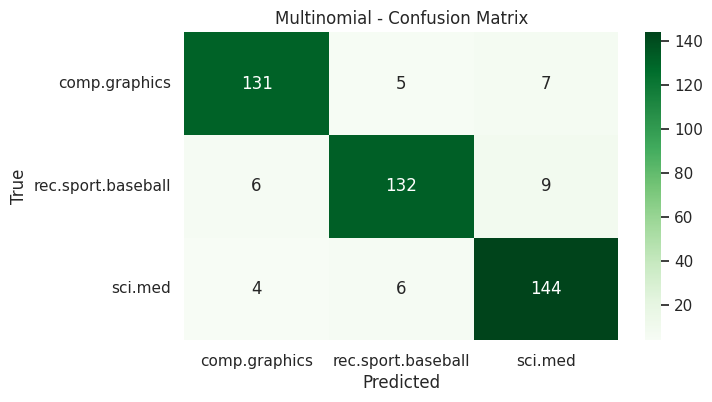

Classification Reports: 
                    precision    recall  f1-score   support

     comp.graphics       0.93      0.92      0.92       143
rec.sport.baseball       0.92      0.90      0.91       147
           sci.med       0.90      0.94      0.92       154

          accuracy                           0.92       444
         macro avg       0.92      0.92      0.92       444
      weighted avg       0.92      0.92      0.92       444



In [48]:
mnb_news = MultinomialNB()
mnb_news.fit(X_train_counts, y_train_text)
y_pred_news = mnb_news.predict(X_test_counts)
acc_news = accuracy_score(y_test_text, y_pred_news)
print('Accuracy: ', acc_news)
cm_news = confusion_matrix(y_test_text, y_pred_news)
print("Confusion matrix: ")
print(cm_news)

sns.heatmap(cm_news, annot=True, fmt='d', cmap='Greens',
    xticklabels=newsgroups.target_names, yticklabels=newsgroups.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Multinomial - Confusion Matrix')
plt.show()

print("Classification Reports: ")
print(classification_report(y_test_text, y_pred_news, target_names=newsgroups.target_names))